#Predicting Overall Rating based on Players Different Stats and Comparing them with their Actual Overall rating


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data PreProcessing

In [2]:
df = pd.read_csv('/content/FB(1).csv')
df

,Unnamed: 0,ID,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Offensive Awareness,...,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating,Price
0,0,5.408000e+03,LB,G. Clichy,Free Agents,France,176,65,37,65,...,74,71,79,40,40,40,40,40,83,0.0
1,1,9.193000e+03,LB,Filipe Luís,CR Flamengo,Brazil,182,74,37,70,...,80,77,78,40,40,40,40,40,85,22.0
2,2,1.581400e+04,LB,Y. Nagatomo,F.C. Tokyo,Japan,170,68,36,65,...,79,81,81,40,40,40,40,40,82,5.9
3,3,3.037700e+04,LB,Fábio Santos,SC Corinthians Paulista,Brazil,179,76,37,70,...,71,70,75,40,40,40,40,40,85,10.0
4,4,3.413500e+04,LB,M. Olsson,Free Agents,Sweden,178,81,34,68,...,74,79,74,40,40,40,40,40,83,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,660,1.055940e+14,RB,Sergi Roberto,FC Barcelona,Spain,178,68,30,74,...,78,78,82,40,40,40,40,40,90,0.0
1276,661,1.066540e+14,RB,K. Trippier,Newcastle WB,England,178,71,32,77,...,78,81,79,40,40,40,40,40,94,0.0
1277,662,1.066540e+14,RB,T. Alexander-Arnold,Liverpool R,England,175,69,24,80,...,78,77,83,40,40,40,40,40,97,0.0
1278,663,3.518530e+14,RB,J. Tavernier,Rangers FC,England,182,75,31,71,...,74,71,71,40,40,40,40,40,87,0.0


As we can see few columns are just **Arbitrary Values** which does not have any effect on Player stats.


1.   Unnamed: 0
2.   Player Name
3.   Team Name
4.   Nationality
5.   ID
6.   Position
7.   Price

So Dropping thes columns will not affect data set.





In [3]:

df = df.drop(['Unnamed: 0','Player Name', 'Team Name','Nationality','ID','Position','Price'], axis = 1)


In [4]:
df

,Height,Weight,Age,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,176,65,37,65,75,71,73,79,77,53,...,77,74,71,79,40,40,40,40,40,83
1,182,74,37,70,78,71,77,78,79,56,...,79,80,77,78,40,40,40,40,40,85
2,170,68,36,65,69,71,68,70,73,54,...,76,79,81,81,40,40,40,40,40,82
3,179,76,37,70,76,72,70,77,78,62,...,74,71,70,75,40,40,40,40,40,85
4,178,81,34,68,67,67,70,68,75,54,...,72,74,79,74,40,40,40,40,40,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,178,68,30,74,79,76,79,84,77,62,...,76,78,78,82,40,40,40,40,40,90
1276,178,71,32,77,80,77,77,78,91,55,...,76,78,81,79,40,40,40,40,40,94
1277,175,69,24,80,79,75,74,85,93,58,...,77,78,77,83,40,40,40,40,40,97
1278,182,75,31,71,71,75,69,72,73,73,...,69,74,71,71,40,40,40,40,40,87


# EXPLORATORY DATA ANALYSIS

<Axes: >

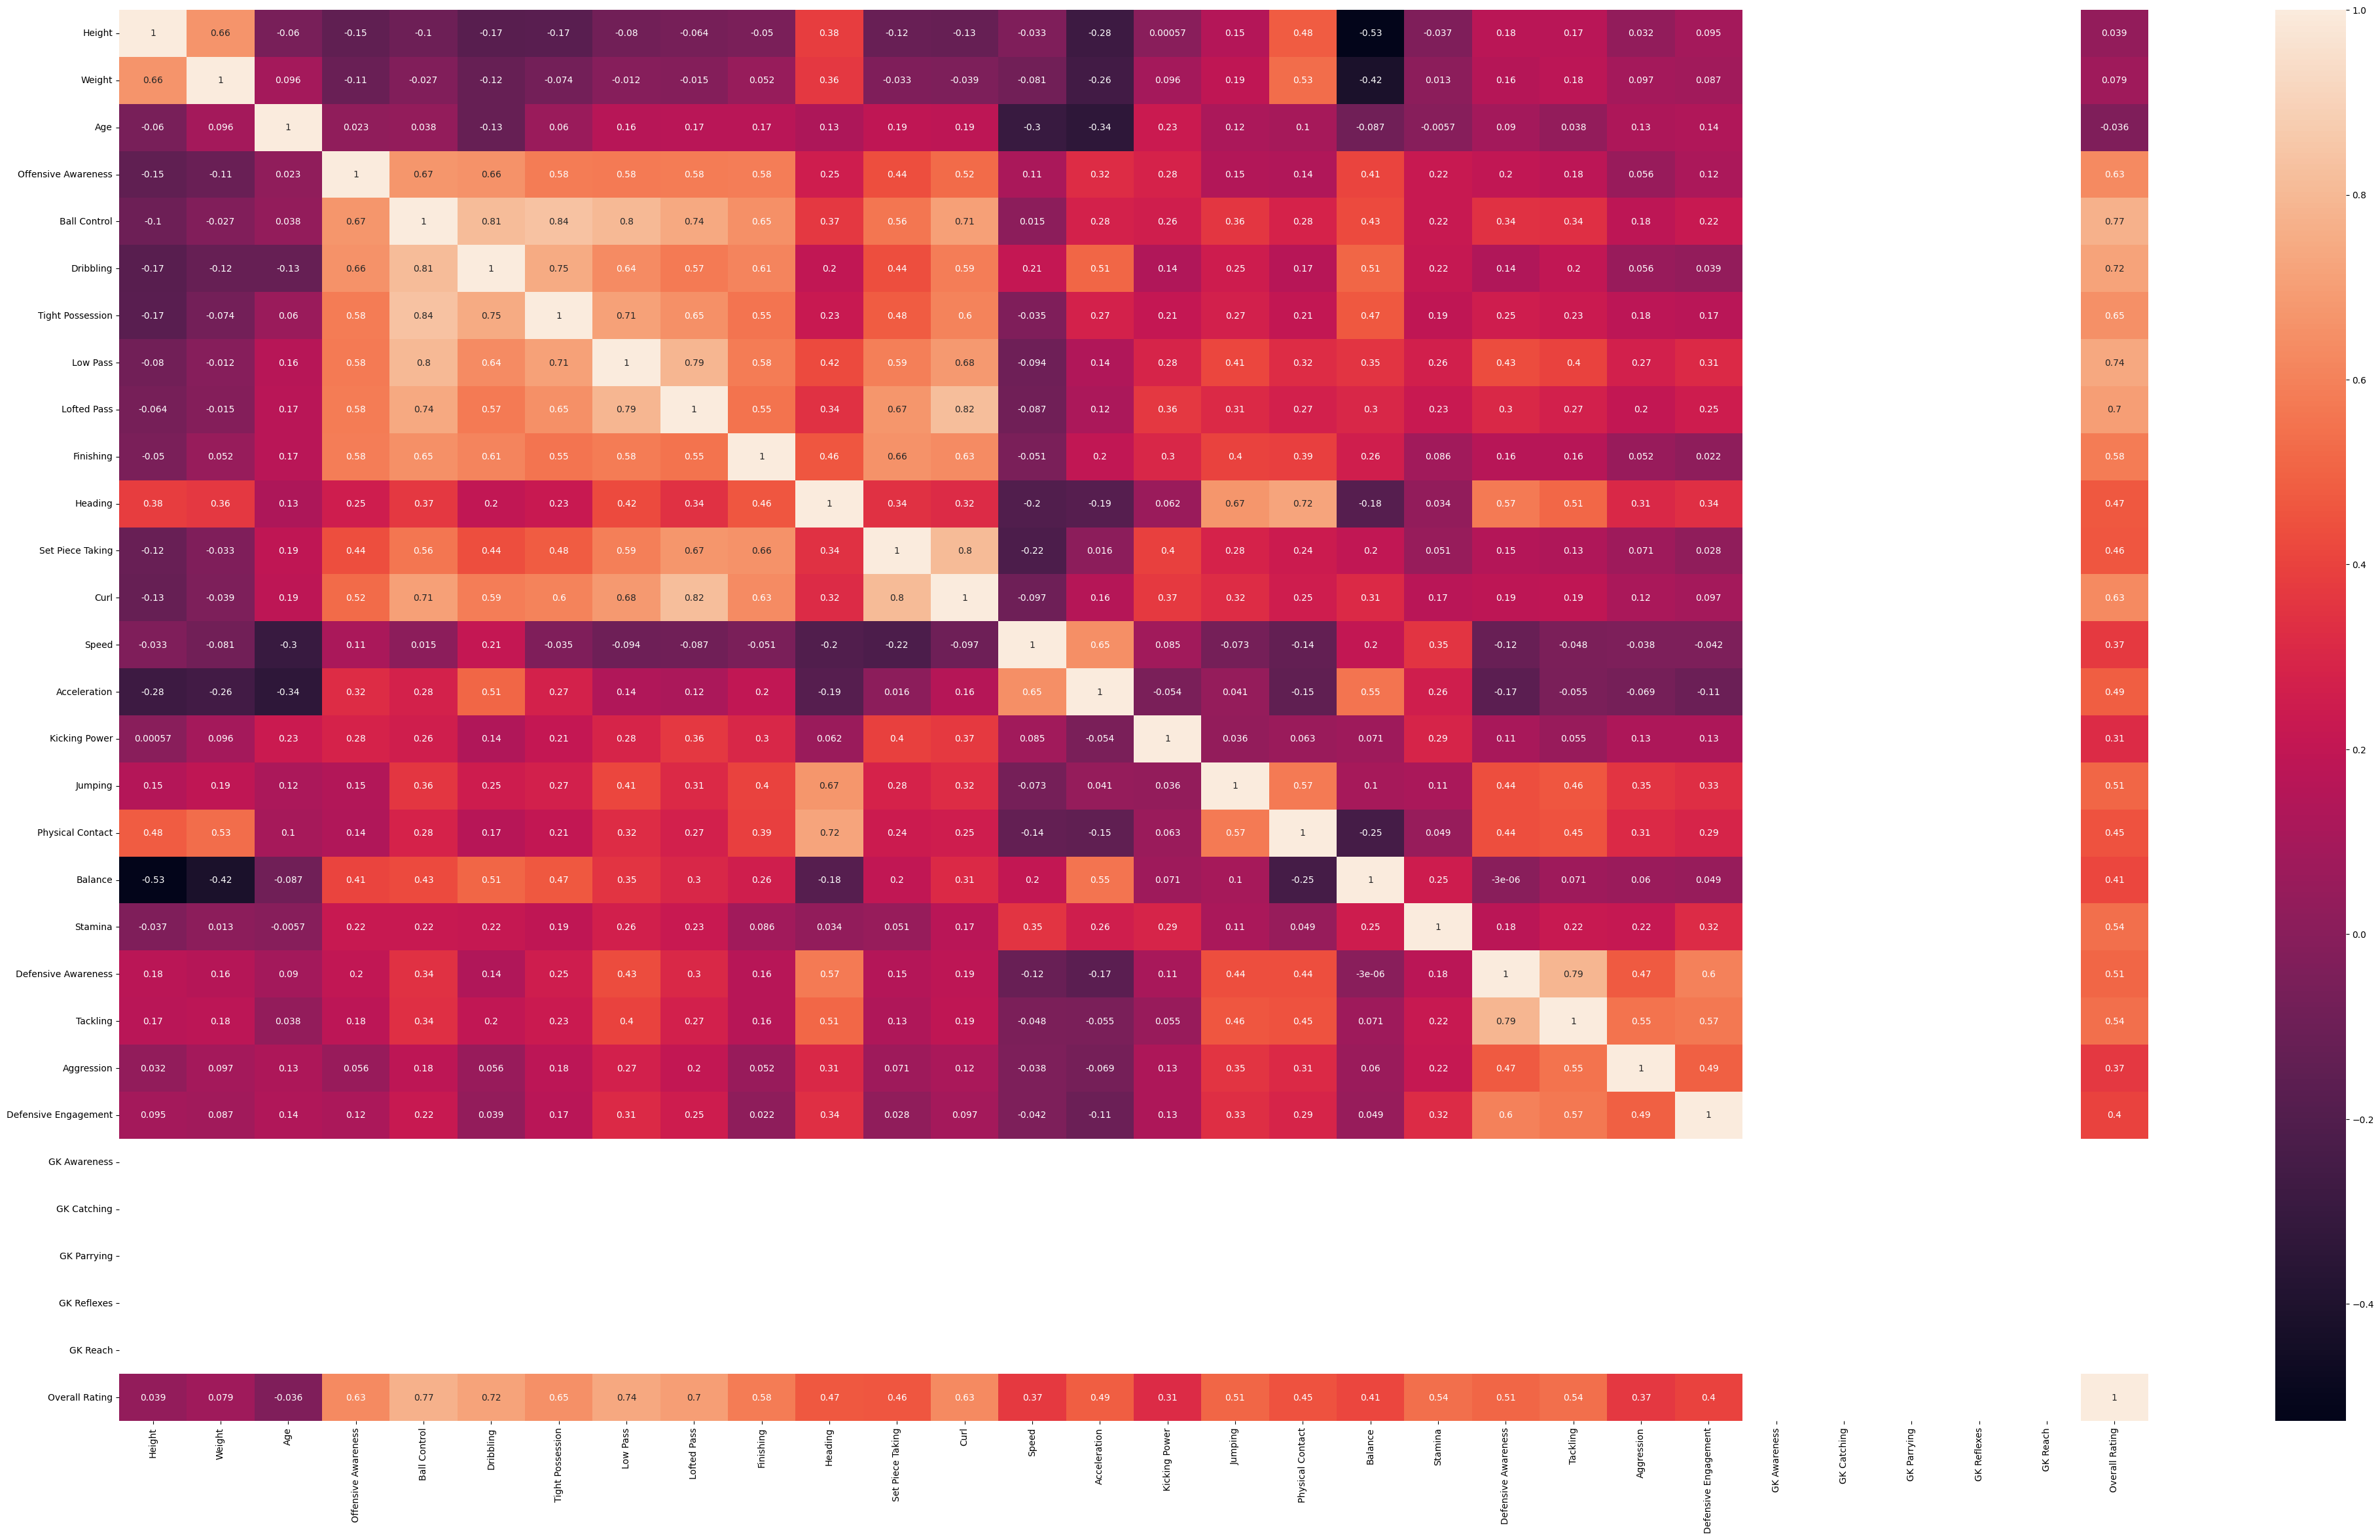

In [5]:
plt.figure(figsize=(50,28))
sns.heatmap(df.corr(), annot = True)

As we can see in the heatmap above overall rating is not correlated significantly with age, weight
and

In [6]:
df = df.drop(['Age','Weight'],axis = 1)

<Axes: xlabel='Lofted Pass', ylabel='Overall Rating'>

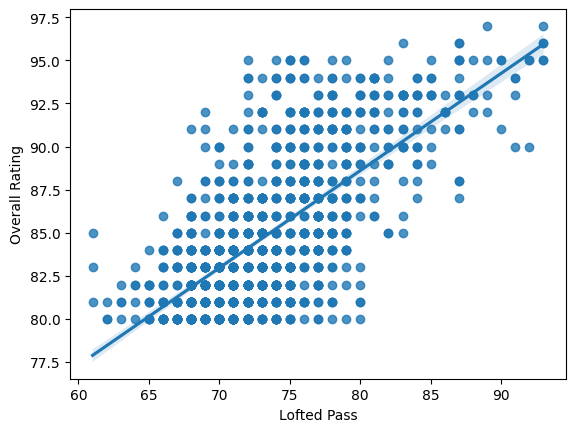

In [8]:
sns.regplot(data = df, x = 'Lofted Pass', y = 'Overall Rating')

<Axes: xlabel='Tackling', ylabel='Overall Rating'>

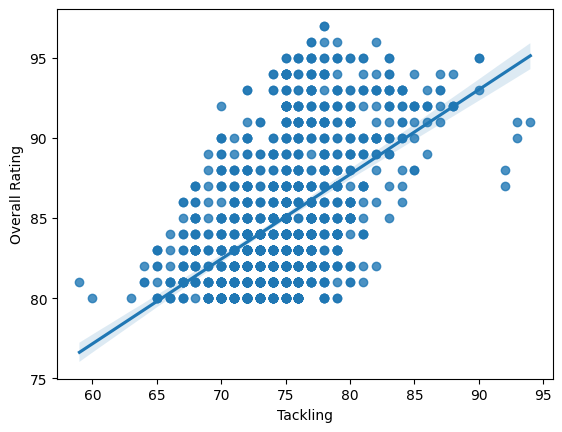

In [9]:
sns.regplot(data = df, x = 'Tackling', y = 'Overall Rating')

Tackling, lofted pass and other defensive stats looks key stats for a Full Back (LB/RB).

##Scaling And Train Test Split

In [10]:
X = df.drop('Overall Rating', axis =1) # Removing the feature we need to predict
y =df['Overall Rating']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(1024, 27)

In [18]:
X_test.shape

(256, 27)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential()

model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [21]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=8,epochs=200)

Epoch 1/200
128/128 [==============================] - 3s 5ms/step - loss: 4729.3403 - val_loss: 109.5243
Epoch 2/200
128/128 [==============================] - 0s 3ms/step - loss: 99.6819 - val_loss: 94.0046
Epoch 3/200
128/128 [==============================] - 1s 4ms/step - loss: 83.9865 - val_loss: 81.2384
Epoch 4/200
128/128 [==============================] - 0s 3ms/step - loss: 72.8923 - val_loss: 69.5688
Epoch 5/200
128/128 [==============================] - 0s 3ms/step - loss: 62.2996 - val_loss: 59.0216
Epoch 6/200
128/128 [==============================] - 0s 3ms/step - loss: 52.4646 - val_loss: 49.5290
Epoch 7/200
128/128 [==============================] - 1s 5ms/step - loss: 44.6178 - val_loss: 42.0464
Epoch 8/200
128/128 [==============================] - 1s 5ms/step - loss: 38.3959 - val_loss: 39.0340
Epoch 9/200
128/128 [==============================] - 0s 4ms/step - loss: 33.5357 - val_loss: 31.9554
Epoch 10/200
128/128 [==============================] - 1s 5ms/step - 

In [22]:
model.save('FB_stats_predictor.h5')

## Now Repeat This process for all other data sets

In [ ]:
#losses = pd.DataFrame(model.history.history)

<Axes: >

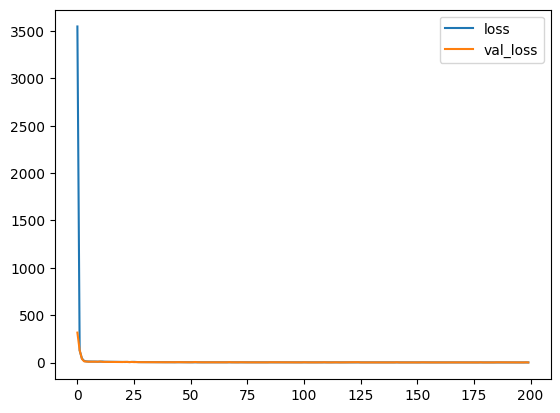

In [ ]:
#losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
#X_test

,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,Heading,Set Piece Taking,Curl,...,Stamina,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach
Height,,,,,,,,,,,,,,,,,,,,,
187,41,48,49,45,53,57,44,52,48,50,...,56,53,47,52,58,82,76,78,83,80
191,41,61,51,60,64,66,41,51,61,48,...,60,47,46,51,60,92,81,84,87,84
192,42,60,44,43,60,60,43,45,60,48,...,59,41,42,45,59,84,73,75,80,76
190,41,56,48,50,59,61,43,48,56,53,...,59,51,48,62,60,87,78,83,83,82
198,41,56,43,44,56,57,41,45,56,43,...,55,46,44,52,60,84,82,77,80,88
191,47,52,48,53,53,52,47,47,52,50,...,58,50,52,52,66,72,76,76,77,77
193,41,48,44,43,49,53,42,49,43,43,...,48,43,45,42,60,76,73,75,74,77
202,48,63,54,59,66,72,48,57,75,73,...,58,51,51,48,68,79,75,77,82,84
197,45,60,55,52,60,65,45,60,60,52,...,59,57,55,57,70,84,79,78,83,87


In [ ]:
#predictions = model.predict(X_test)

1/1 [==============================] - 0s 79ms/step


In [ ]:
#mean_absolute_error(y_test,predictions)

0.8091767834078881

In [ ]:
#model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 27)                729       
                                                                 
 dense_37 (Dense)            (None, 27)                756       
                                                                 
 dense_38 (Dense)            (None, 27)                756       
                                                                 
 dense_39 (Dense)            (None, 1)                 28        
                                                                 
Total params: 2,269
Trainable params: 2,269
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.get_layer('dense_1').get_weights()

ValueError: ignored

###Predicting On a New Player

In [ ]:
#pl = df.drop('Overall Rating',axis=1).iloc[900]

In [ ]:
#pl = scaler.transform(pl.values.reshape(-1,26))

In [ ]:
#pl

In [ ]:
#model.predict(pl)

In [ ]:
#df.iloc[900]

In [ ]:
#model.get_weights()

In [ ]:
#df

In [ ]:
new_row = [83,84,93,82,73,71,84,71,66,78,92,92,83,75,83,87,79,50,52,63,58,40,40,40,40,40,40]
newDF.append(pd.Series(new_row, index=newDF.columns[:len(new_row)]), ignore_index=True)

df.append([83,84,93,82,73,71,84,71,66,78,92,92,83,75,83,87,79,50,52,63,58,40,40,40,40,40,40])

In [ ]:
model.save('cf_stats_predictor.h5')